In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
%matplotlib inline

In [36]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [9]:
y = np.random.randn(1000)

In [10]:
fft_y = np.fft.fft(y)

In [11]:
ifft_y = np.copy(fft_y)
ifft_y[450:-450] = 0

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


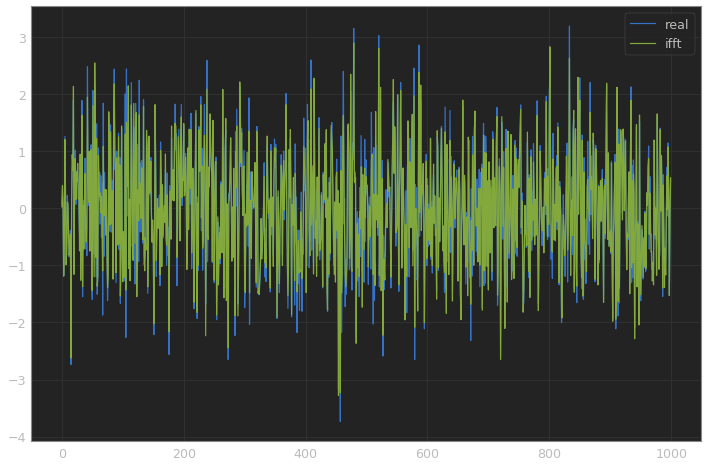

In [12]:
plt.plot(y, label="real")
plt.plot(np.fft.ifft(ifft_y), label="ifft")
plt.legend()

In [13]:
x = np.linspace(-3, 3, 300)
y = np.abs(x[:100]) - .5
y = np.concatenate((y, np.power(x[100:-100], 2) * .5))
y = np.concatenate((y, np.abs(x[-100:]) - .5))

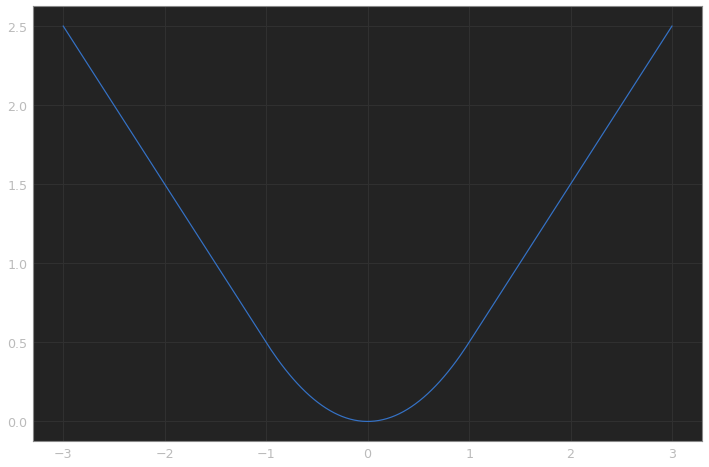

In [8]:
plt.plot(x, y)

In [1]:
%%latex

\begin{array}{ll}

\text{Softmax}(x_{i}) = \frac{exp(x_i)}{\sum_j exp(x_j)}

\end{array}

<IPython.core.display.Latex object>

In [4]:
%%latex
\begin{array}{ll}
r = \sigma(W_{ir} x + b_{ir} + W_{hr} h + b_{hr}) \\
z = \sigma(W_{iz} x + b_{iz} + W_{hz} h + b_{hz}) \\
n = \tanh(W_{in} x + b_{in} + r * (W_{hn} h + b_{hn})) \\
h' = (1 - z) * n + z * h
\end{array}

<IPython.core.display.Latex object>

In [5]:
%%latex
\begin{array}{ll}
H_{out} = \left\lfloor\frac{H_{in}  + 2 \times \text{padding}[0] - \text{dilation}[0]\times (\text{kernel\_size}[0] - 1) - 1}{\text{stride}[0]} + 1\right\rfloor

W_{out} = \left\lfloor\frac{W_{in}  + 2 \times \text{padding}[1] - \text{dilation}[1]\times (\text{kernel\_size}[1] - 1) - 1}{\text{stride}[1]} + 1\right\rfloor
\end{array}

<IPython.core.display.Latex object>

In [10]:
from scipy.signal import lfilter

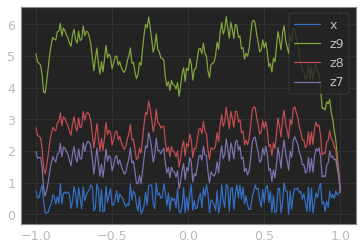

In [16]:
t = np.linspace(-1, 1, 201) 
# x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))
x = np.random.rand(201)

z_9 = lfilter([1], [1, -.9], x[::-1])[::-1]
z_8 = lfilter([1], [1, -.8], x[::-1])[::-1]
z_7 = lfilter([1], [1, -.7], x[::-1])[::-1]

plt.plot(t, x)
plt.plot(t, z_9)
plt.plot(t, z_8)
plt.plot(t, z_7)
plt.legend(['x', 'z9', 'z8', 'z7'], loc='best')

plt.show()

In [15]:
x

array([-2.19891827,  0.316638  ,  1.98343607,  0.12268127,  0.61666547,
        0.36071186, -0.87963379,  0.48756717,  0.4608583 ,  0.75983196,
        0.34770264, -0.46523606,  1.8410659 , -0.54376008, -1.58491507,
       -0.10546665,  0.72566069, -0.12272159,  1.88465048,  0.32407901,
       -2.709428  ,  0.03532932, -1.51379269,  1.30034615,  1.02907752,
        0.46537914, -0.24850759, -0.60106599,  0.11828789,  0.8778069 ,
       -0.96747625, -0.28768423, -1.03437298, -1.4089241 , -0.6687049 ,
       -1.04959916,  0.4861789 ,  0.14375933, -1.6748145 ,  0.3901386 ,
       -0.01273721,  1.49289557,  0.80721113, -0.47167209, -0.47172138,
        0.79474589, -1.29958022, -0.19370611,  0.97366483,  0.22925148,
        0.31560762, -1.29467013, -0.56483554,  0.60321668, -0.71009354,
        0.04181677,  0.37288432,  0.40434321, -0.6737002 ,  0.53464771,
        0.71407354, -0.63076355, -0.20606171,  1.09293267, -1.04044316,
       -0.31432108, -0.476028  ,  1.1009803 , -2.50274495, -1.06

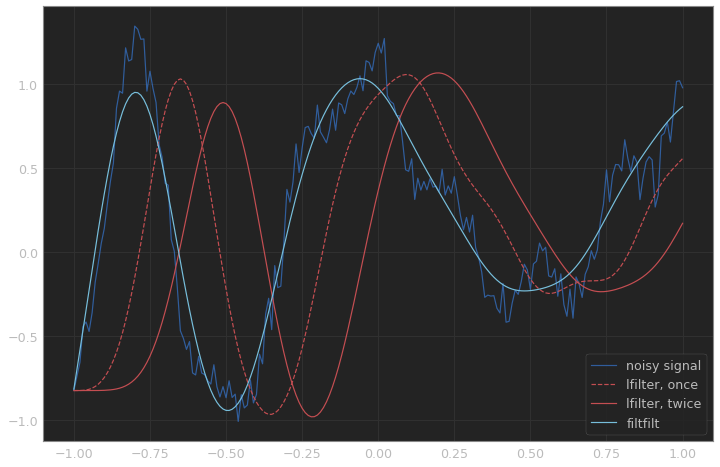

In [9]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b, a = signal.butter(3, 0.05, )

zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

y = signal.filtfilt(b, a, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'c')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [3]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

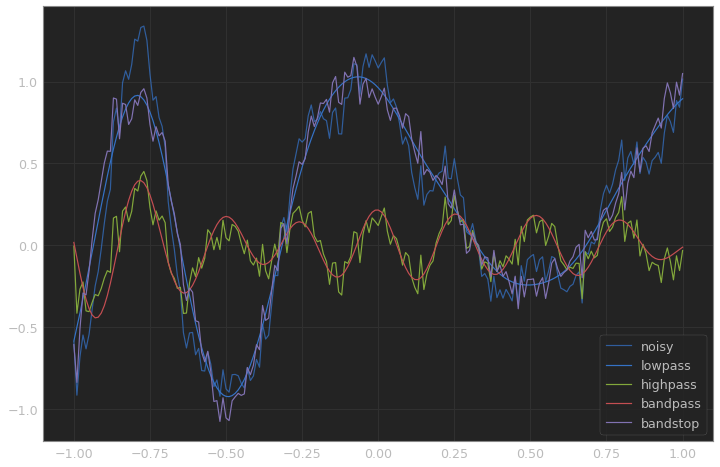

In [10]:
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) + 0.1*np.sin(2*np.pi*1.25*t + 1) + 0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

b1, a1 = signal.butter(3, 0.05, btype='lowpass')
b2, a2 = signal.butter(3, 0.05, btype='highpass')
b3, a3 = signal.butter(3, [0.05, 0.1], btype='bandpass')
b4, a4 = signal.butter(3, [0.05, 0.1], btype='bandstop')

y1 = signal.filtfilt(b1, a1, xn)
y2 = signal.filtfilt(b2, a2, xn)
y3 = signal.filtfilt(b3, a3, xn)
y4 = signal.filtfilt(b4, a4, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, y1, 'r', t, y2, 'c', t, y3, 'y', t, y4, 'g')
plt.legend(('noisy', 'lowpass', 'highpass', 'bandpass', 'bandstop'), loc='best')
plt.grid(True)
plt.show()

In [32]:
import xgboost as xgb
from featexp import get_univariate_plots
from featexp import get_trend_stats
from sklearn.model_selection import train_test_split

In [37]:
train = pd.read_csv('/home/left/data/home_credit_default_risk/application_train.csv')

In [6]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
string_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                  'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                  'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',]

In [8]:
for col in string_columns:
    for i, value in enumerate(train[col].unique()):
        train[train[col] == value] = i + 1

In [9]:
with pd.option_context('display.max_rows', 200, 'display.max_columns', 100, 'display.width', 100):
    print(train.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE                int64
CODE_GENDER                       int64
FLAG_OWN_CAR                      int64
FLAG_OWN_REALTY                   int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                   int64
NAME_INCOME_TYPE                  int64
NAME_EDUCATION_TYPE               int64
NAME_FAMILY_STATUS                int64
NAME_HOUSING_TYPE                 int64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
X = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [12]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

                                         Plots for DAYS_BIRTH                                         


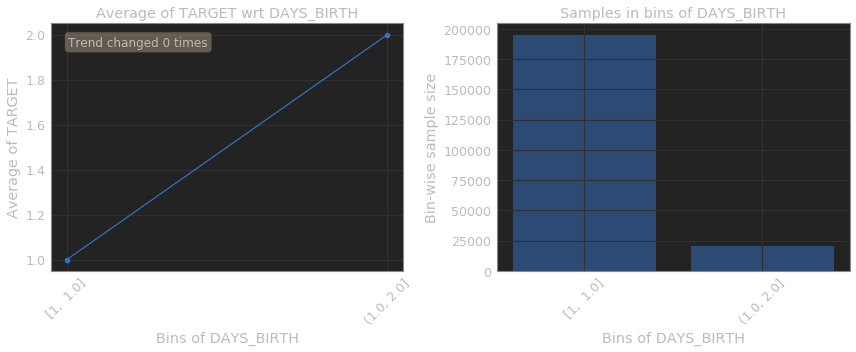

--------------------------------------------------------------------------------------------------------------




In [13]:
get_univariate_plots(data=train_data, target_col='TARGET', features_list=['DAYS_BIRTH'], bins=10)

                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


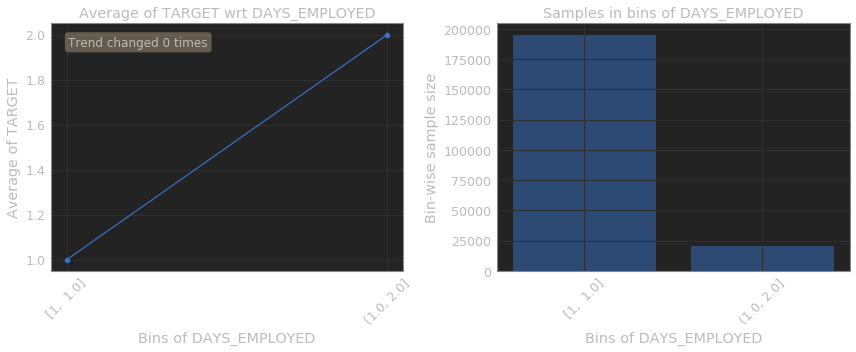

                                           Test data plots                                            


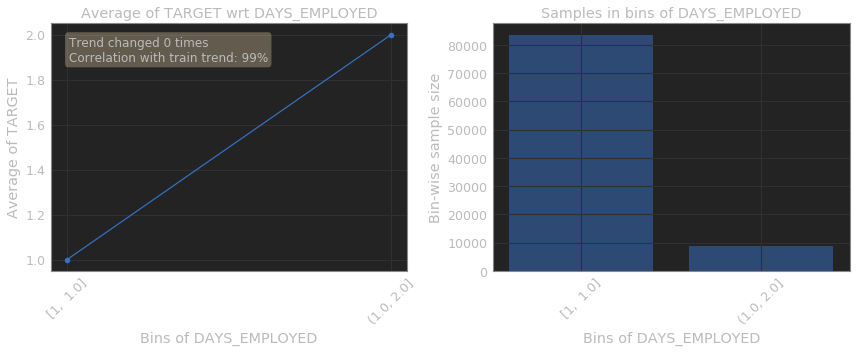

--------------------------------------------------------------------------------------------------------------




In [14]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['DAYS_EMPLOYED'], bins=10)

                                Plots for YEARS_BEGINEXPLUATATION_MODE                                
                                           Train data plots                                           


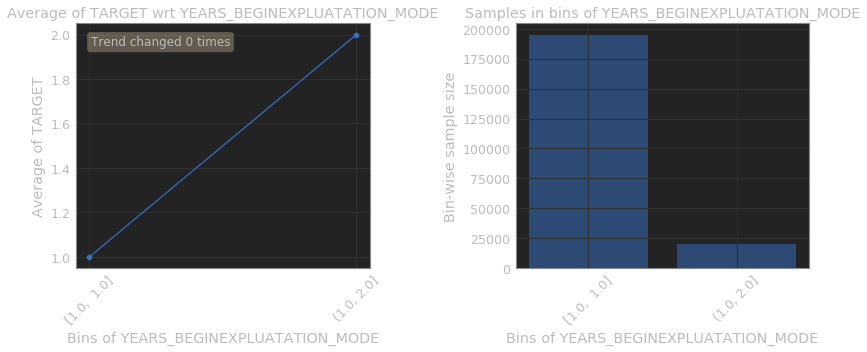

                                           Test data plots                                            


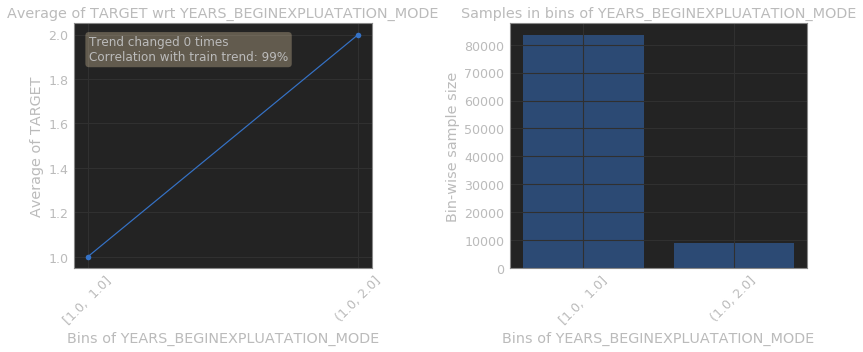

--------------------------------------------------------------------------------------------------------------




In [15]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['YEARS_BEGINEXPLUATATION_MODE'])

                                        Plots for EXT_SOURCE_1                                        
                                           Train data plots                                           


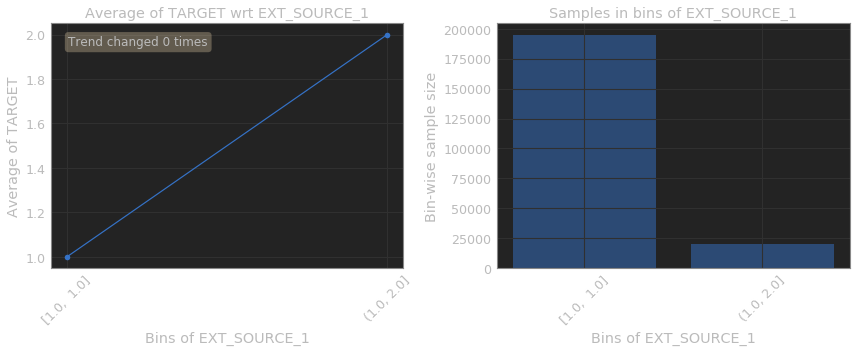

                                           Test data plots                                            


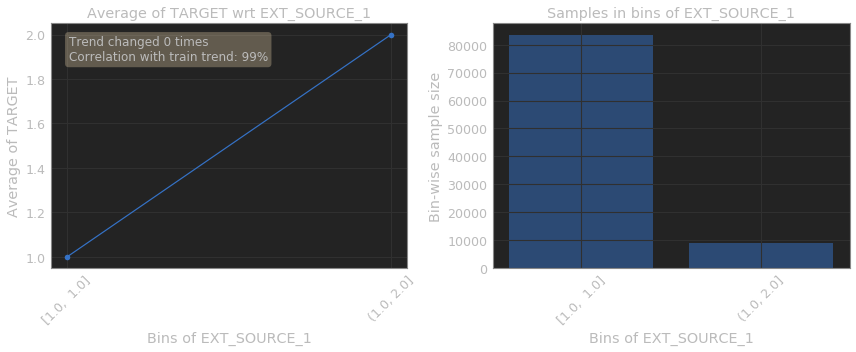

--------------------------------------------------------------------------------------------------------------




In [16]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['EXT_SOURCE_1'])

                                 Plots for AMT_REQ_CREDIT_BUREAU_YEAR                                 
                                           Train data plots                                           


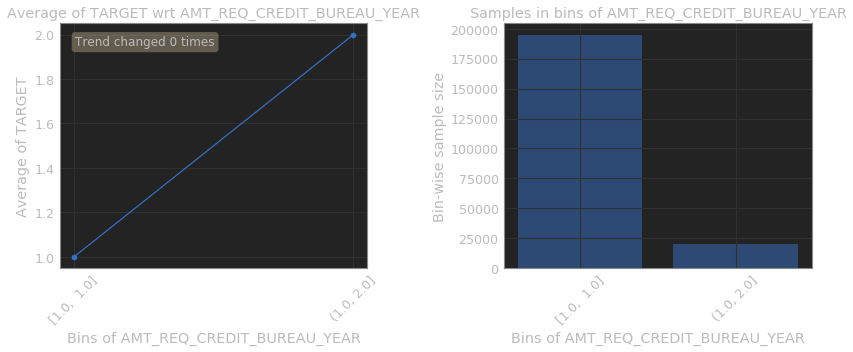

                                           Test data plots                                            


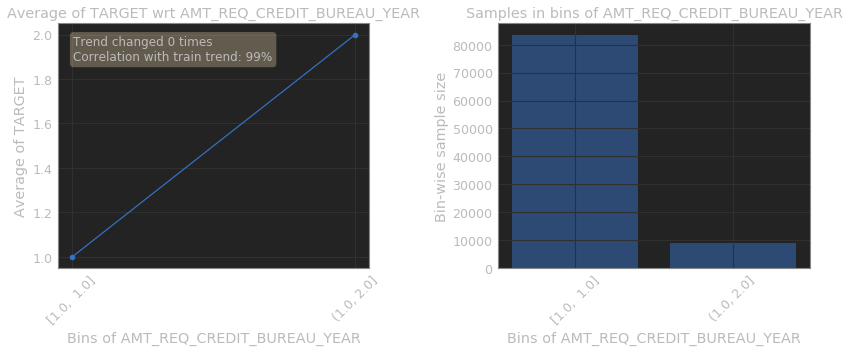

--------------------------------------------------------------------------------------------------------------




In [17]:
get_univariate_plots(data=train_data, target_col='TARGET', data_test=test_data, features_list=['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [18]:
stats = get_trend_stats(data=train_data, target_col='TARGET', data_test=test_data)

Returning stats for all numeric features


In [19]:
with pd.option_context('display.max_rows', 200, 'display.max_columns', 10, 'display.width', 100):  # more options can be specified also
    print(stats)

                          Feature  Trend_changes  Trend_changes_test  Trend_correlation
0                      SK_ID_CURR              0                   0                1.0
1              NAME_CONTRACT_TYPE              0                   0                1.0
2                     CODE_GENDER              0                   0                1.0
3                    FLAG_OWN_CAR              0                   0                1.0
4                 FLAG_OWN_REALTY              0                   0                1.0
5                    CNT_CHILDREN              0                   0                1.0
6                AMT_INCOME_TOTAL              0                   0                1.0
7                      AMT_CREDIT              0                   0                1.0
8                     AMT_ANNUITY              0                   0                1.0
9                 AMT_GOODS_PRICE              0                   0                1.0
10                NAME_TYPE_SUIT

In [20]:
with pd.option_context('display.max_rows', 200, 'display.max_columns', 100, 'display.width', 100):  # more options can be specified also
    print(X_train.head())
# X_train.head()

        SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
24423            1                   1            1             1                1             1   
156452           1                   1            1             1                1             1   
219133           1                   1            1             1                1             1   
252520           1                   1            1             1                1             1   
155260           1                   1            1             1                1             1   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  \
24423                1.0         1.0          1.0              1.0                1   
156452               1.0         1.0          1.0              1.0                1   
219133               1.0         1.0          1.0              1.0                1   
252520               1.0         1.0          1.0  

In [28]:
print(y_test.unique())
print(y_train.unique())
print(X_test.NAME_CONTRACT_TYPE.unique())
print(X_test.CODE_GENDER.unique())
print(X_test.FLAG_OWN_CAR.unique())
print(X_test.FLAG_OWN_REALTY.unique())
print(X_test.NAME_TYPE_SUITE.unique())
print(X_test.NAME_INCOME_TYPE.unique())
print(X_test.NAME_EDUCATION_TYPE.unique())
print(X_test.NAME_FAMILY_STATUS.unique())
print(X_test.NAME_HOUSING_TYPE.unique())
print(X_test.OCCUPATION_TYPE.unique())
print(X_test.WEEKDAY_APPR_PROCESS_START.unique())
print(X_test.ORGANIZATION_TYPE.unique())

[2 1]
[1 2]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]
[2 1]


In [22]:
y_test[:100]

11882     2
26530     1
196122    1
274002    1
24097     1
         ..
186929    2
172796    2
10819     2
228890    1
302786    1
Name: TARGET, Length: 100, dtype: int64

In [31]:
xgb.DMatrix?

Object `xgb.DMatrix` not found.


In [ ]:
# X_train, X_test, y_train, y_test
y_test = y_test + 1
y_train = y_train + 1
dtrain = xgb.DMatrix(X_test, label=y_test, missing=np.nan)
dtest = xgb.DMatrix(X_train, label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':500,
            'eval_metric' : 'auc', 'nthread':8 } #col_sample_by_tree
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25) #, (dtest, 'test')

##### bayes

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 240)
yg = np.linspace(ylim[0], ylim[1], 160)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

In [33]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu') #, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.1, cmap='RdBu') #  cmap='RdBu'
plt.axis(lim)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

X = np.asarray([-52, -54, -31, -16, 38, -7, 70, 55, -35, 32])
Y = np.asarray([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])
# cv = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, Y, discrete_features=True)
               ))
print(res)

AttributeError: 'numpy.int64' object has no attribute 'lower'

In [4]:
from info_gain import info_gain

In [8]:
X = np.asarray([-52, -54, -31, -16, 38, -7, 70, 55, -35, 32])
Y = np.asarray([82, 80, 103, 118, 172, 127, 204, 189, 99, 166])

In [9]:
info_gain.info_gain(X, Y)

2.3025850929940455

In [7]:
from baselines.common import plot_util as pu

In [23]:
results = pu.load_results('/home/left/code/python/openai/logs/Pong')

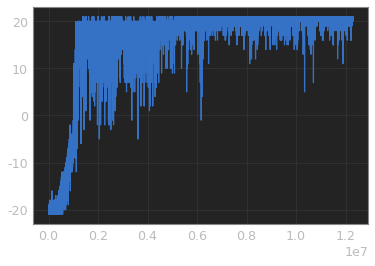

In [24]:
import matplotlib.pyplot as plt
import numpy as np
r = results[0]
plt.plot(np.cumsum(r.monitor.l), r.monitor.r)

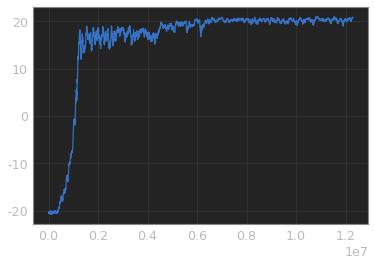

In [25]:
plt.plot(np.cumsum(r.monitor.l), pu.smooth(r.monitor.r, radius=10))

In [26]:
plt.plot(r.progress.total_timesteps, r.progress.eprewmean)

AttributeError: 'DataFrame' object has no attribute 'total_timesteps'

(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f156a8f3898>]],
       dtype=object))

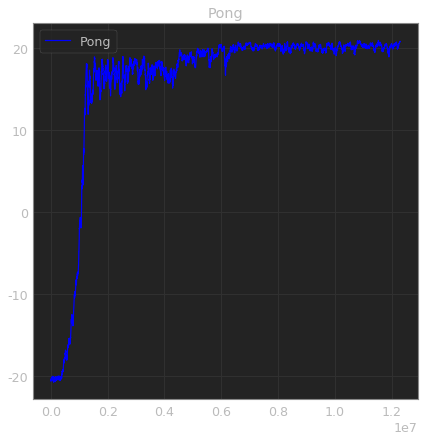

In [27]:
pu.plot_results(results)

(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f156a875be0>]],
       dtype=object))

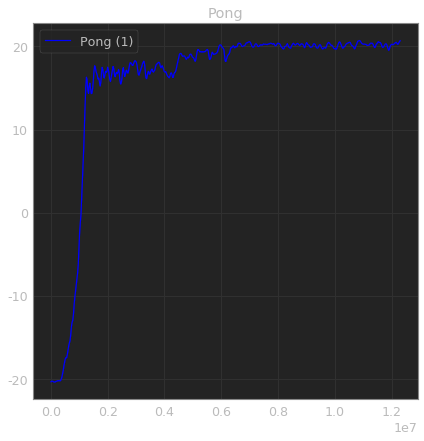

In [28]:
pu.plot_results(results, average_group=True)

(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f156a7dce10>]],
       dtype=object))

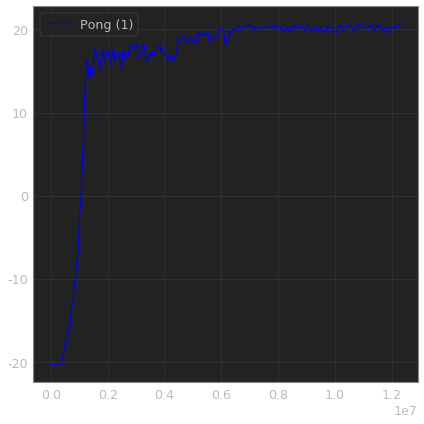

In [29]:
pu.plot_results(results, average_group=True, split_fn=lambda _: '')

(<Figure size 432x432 with 1 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f156a7c3e48>]],
       dtype=object))

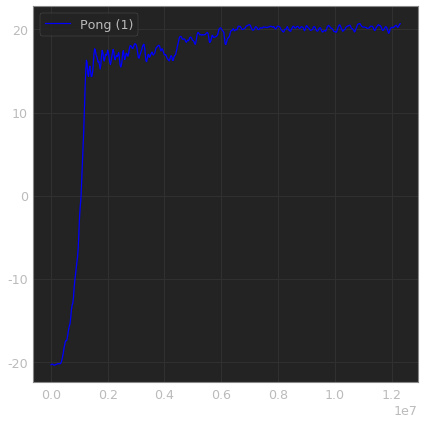

In [30]:
pu.plot_results(results, average_group=True, split_fn=lambda _: '', shaded_std=False)

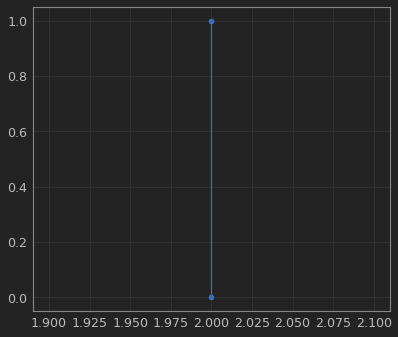

In [4]:
plt.plot([2] * 2, [0, 1], marker='o', color='b')

In [3]:
import functools

In [55]:
def try_request_count(wait_count=50):
    def _request_count(func):
#         @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, **kwargs)

        return wrapper
    return _request_count


In [56]:
@try_request_count(20)
def xxx():
    
    print('cccc')

In [57]:
xxx()

cccc


In [62]:
def try_request_count(**kkwargs):
    def _request_count(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(kkwargs)
            return func(*args, **kwargs)
        return wrapper
    return _request_count

In [65]:
@try_request_count
def xxx():
    
    print('cccc')

TypeError: try_request_count() takes 0 positional arguments but 1 was given

In [66]:
xxx()

{'a': 1}
cccc


In [39]:
def logging1(flag):
    def decorator(func):
        def inner(num1, num2):
            return func(num1, num2)
        return inner
    return decorator

In [40]:
@logging1("-")             # @logging("+") ==> @decorator
def add(a, b):
    return a + b

In [41]:
add(1, 2)

3